In [89]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

## Understanding Sigmoid curve

In [90]:
x = np.linspace(-4,4,1000)
def sigmoid(x:np.array)->np.array:
    return 1/(1+np.exp(-x*2))

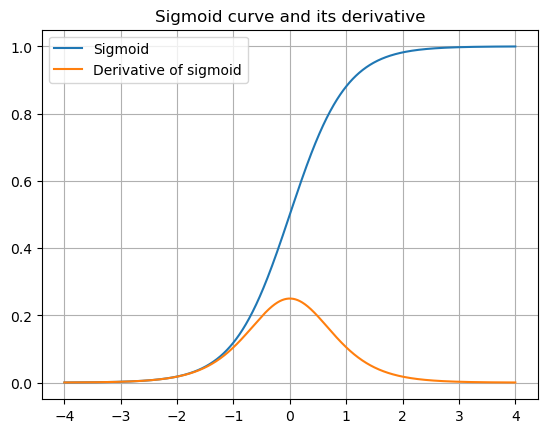

In [91]:
sns.lineplot(x=x,y=sigmoid(x),label='Sigmoid')
sns.lineplot(x=x,y=sigmoid(x)*(1-sigmoid(x)),label='Derivative of sigmoid')
plt.title("Sigmoid curve and its derivative")
plt.grid()
plt.show()

## Simple Use case of logistic regression

In [92]:
from sklearn.datasets import make_blobs

In [93]:
X,y = make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=2.2,random_state=25) 

In [94]:
X,y = abs(X),y

In [95]:
# w0 + w1*x + w2*y = 0

In [96]:
# y = -(w0/w2)-(w1/w2)*x

In [97]:
def giveXY(coeff: np.array)->tuple:
    return -coeff[0]/coeff[2],-coeff[1]/coeff[2]

In [98]:
def logLoss(Actual: np.array,predictions: np.array)->tuple:
    # calculating probability belonging to class 1
    # Even for class label = 0, probability is taken as probability belongs to class 1
    Adjusted_prob = [(1-pred) if act == 0 else pred for act,pred in list(zip(y,predictions))]
    probabilities = np.array(Adjusted_prob)
    return -1 * (np.log(probabilities).sum()/Actual.shape[0]),probabilities
def sigmoid(x:np.array)->np.array:
    return 1/(1+np.exp(-x*2))

In [165]:
epochs = range(1,250)
features = np.insert(X,0,1,axis=1)
np.random.seed(10)
weights = np.random.rand(features.shape[1])
weights_mat = weights.copy().reshape(1,-1)
initial_weights = weights.reshape(1,-1).copy()
learning_rate = 0.01
log_loss_each_step = []

for i in epochs:    
    # calculating weighted features
    weighted_sum = np.dot(features,weights)
    
    # calculating log_loss for a random data point
    # w_new = w_old - learning_rate * (y_pred,y_act)* Xij
    
    avg_log_loss = logLoss(y,sigmoid(weighted_sum.flatten()))[0]
    log_loss_each_step.append(avg_log_loss)
    
    random_point = np.random.randint(0,features.shape[0],1)[0]
    weights_correction = 0.01 * (sigmoid(np.dot(features[random_point,:],weights)) - y[random_point]) * features[random_point,:]
    weights = weights - weights_correction
    weights_mat = np.append(weights_mat,weights.reshape(1,-1),axis=0)

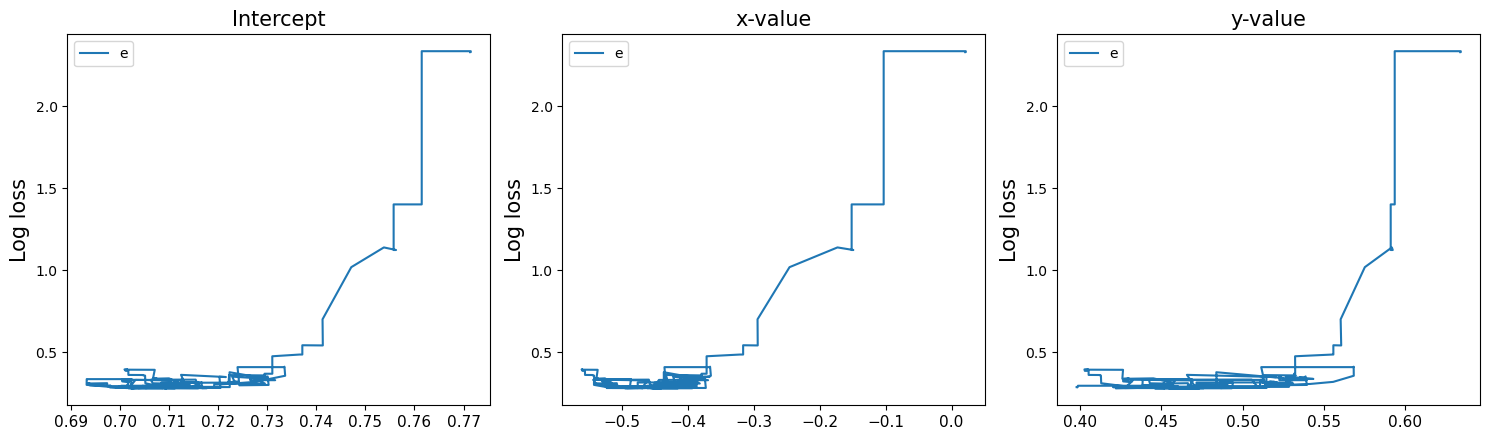

In [166]:
plt.subplots(1,3,figsize=(15,4.5))

plt.subplot(131)
plt.plot(weights_mat[1:,0],log_loss_each_step)
plt.xticks(fontsize=11)
plt.ylabel("Log loss",fontsize=15)
plt.title("Intercept",fontsize=15)
plt.legend(f"epochs - {epochs}")

plt.subplot(132)
plt.plot(weights_mat[1:,1],log_loss_each_step)
plt.xticks(fontsize=11)
plt.ylabel("Log loss",fontsize=15)
plt.title("x-value",fontsize=15)
plt.legend(f"epochs - {epochs}")

plt.subplot(133)
plt.plot(weights_mat[1:,2],log_loss_each_step)
plt.xticks(fontsize=11)
plt.ylabel("Log loss",fontsize=15)
plt.title("y-value",fontsize=15)
plt.legend(f"epochs - {epochs}")

plt.tight_layout()
plt.show()

In [141]:
# w0 + w1*x + w2*y = 0
# y = -(w0/w2)-(w1/w2)*x

def giveXY(coeff: np.array)->tuple:
    return -coeff[0]/coeff[2],-coeff[1]/coeff[2]

In [167]:
plot_line = np.linspace(0,14,15)

In [168]:
initial_weights

array([[0.77132064, 0.02075195, 0.63364823]])

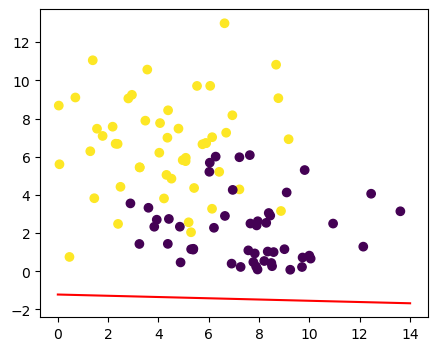

In [169]:
plt.figure(figsize=(5,4))
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(plot_line,(giveXY(initial_weights.flatten())[1]*plot_line+giveXY(initial_weights.flatten())[0]),color='red')
plt.show()

In [145]:
giveXY(weights)

(-1.757367374860047, 1.1273047581697553)

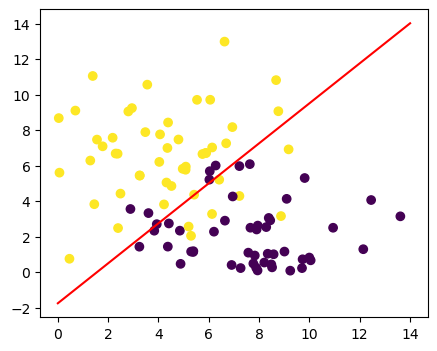

In [146]:
plt.figure(figsize=(5,4))
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(plot_line,(giveXY(weights.flatten())[1]*plot_line+giveXY(weights.flatten())[0]),color='red')
plt.show()

In [147]:
# plt.figure(figsize=(5,4))
# plt.scatter(X[:,0],X[:,1],c=y)
# plt.plot(plot_line,(0.8134449713683137*plot_line+0.1692060878944291),color='red')
# plt.show()

In [56]:
def logistic_regression(iterations:int)->tuple:
    '''
    returns slope (m) and
    intercept (c)
    '''
    epochs = range(1,iterations)
    features = np.insert(X,0,1,axis=1)
    np.random.seed(7)
    weights = np.random.rand(features.shape[1])
    initial_weights = weights.reshape(1,-1).copy()
    learning_rate = 0.01
    log_loss_each_step = []

    for i in epochs:
        # calculating weighted sum of features and weights
        weighted_sum = np.dot(features,weights)
        
        # calculating log_loss for a random data point
        # w_new = w_old - learning_rate * (y_pred - y_act)* Xij
        # w_new = w_old - learning_rate * (A-y)* Xij
        # c_new = c_old - learning rate * (A-y)* 1

        avg_log_loss = logLoss(y,sigmoid(weighted_sum.flatten()))[0]
        log_loss_each_step.append(avg_log_loss)

        random_point = np.random.randint(0,features.shape[0],1)[0]
        weights_correction = 0.01 * (sigmoid(np.dot(features[random_point,:],weights)) - y[random_point]) * features[random_point,:]
        weights = weights - weights_correction
    return giveXY(weights)

In [57]:
width = np.linspace(0,0.75,100)

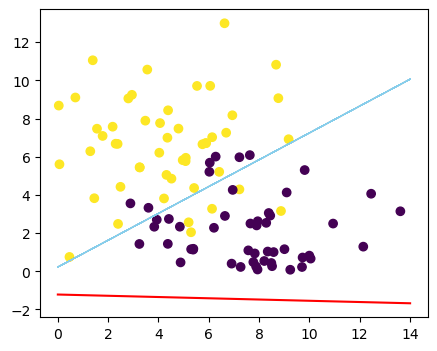

In [170]:
plt.figure(figsize=(5,4))
plt.scatter(X[:,0],X[:,1],c=y)
for i in range(100):
    if i == 0:
        plt.plot(plot_line,(giveXY(initial_weights.flatten())[1]*plot_line+giveXY(initial_weights.flatten())[0]),
        color='red')
    else:
        m,c = logistic_regression(35)[1],logistic_regression(35)[0]
        plt.plot(plot_line,(m*plot_line+c),c='skyblue',lw=width[i])
plt.show()